# UV-Vis Data Collection Project

In [1]:
import pandas as pd

Below a table will be constructed containing the UV-vis data from a crystal violet experiment. There will be five reactions with varying concentrations of NaOH in M. The slope represents the absorbance over time, as the violet color from crystal violet fades over time as the reaction proceeds.

In [2]:
uvvis = pd.read_csv("crystalvioletformatted", delim_whitespace=False,
                    usecols=['Reaction','hydroxide','Time','Abs'], parse_dates=True)
print(uvvis)

     Reaction  hydroxide        Time      Abs
0         1.0       0.10    0.312425  0.04874
1         1.0       0.10    1.546510  0.04840
2         1.0       0.10    2.796216  0.04744
3         1.0       0.10    4.030302  0.04664
4         1.0       0.10    5.280008  0.04594
..        ...        ...         ...      ...
944       5.0       0.02  355.288854  0.04349
945       5.0       0.02  356.522939  0.04339
946       5.0       0.02  357.757023  0.04329
947       5.0       0.02  358.991108  0.04329
948       5.0       0.02  360.225193  0.04310

[949 rows x 4 columns]


/var/folders/lg/pxhq72654cv7w99d71t8t13r0000gn/T/ipykernel_99555/944261660.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  uvvis = pd.read_csv("crystalvioletformatted", delim_whitespace=False,


The concentration of crystal violet in Molar was calculated using Beer's Law and added to the table under the column "cv".

In [3]:
uvvis["cv"]=uvvis["Abs"]/87000
print(uvvis)


     Reaction  hydroxide        Time      Abs            cv
0         1.0       0.10    0.312425  0.04874  5.602299e-07
1         1.0       0.10    1.546510  0.04840  5.563218e-07
2         1.0       0.10    2.796216  0.04744  5.452874e-07
3         1.0       0.10    4.030302  0.04664  5.360920e-07
4         1.0       0.10    5.280008  0.04594  5.280460e-07
..        ...        ...         ...      ...           ...
944       5.0       0.02  355.288854  0.04349  4.998851e-07
945       5.0       0.02  356.522939  0.04339  4.987356e-07
946       5.0       0.02  357.757023  0.04329  4.975862e-07
947       5.0       0.02  358.991108  0.04329  4.975862e-07
948       5.0       0.02  360.225193  0.04310  4.954023e-07

[949 rows x 5 columns]


## Curve Fitting 

In [4]:
import numpy as numpy

This imports a collection of functions know as numpy, and I named it as numpy as well to keep track of it.

In [5]:
from scipy.optimize import curve_fit

This imports the curve fit function from the SciPy reference manual. This specific function was found under the scipy.optimize section which includes methods of solving nonlinear data sets, though I am also using it for a linear set for the sake of consistency.

In [6]:
def first(x, a, b):
    return a * numpy.exp(-b * x)

This code defines a function that I have titled "first" and it will be used to fit the data to a first-order, exponential line. The parameter "a" is the initial concentration, "b" is the rate constant k, and "x" is the time. Follows the equation: [A]=[A0]e^(-kt)

In [7]:
def zero(x, a, b):
    return -a * x + b

This code defines a function that I have titled "zero" and it will be used to fit the data to a zero-order, linear line. The parameter "a" is the rate constant k, "b" is the initial concentration, and "x" is the time. Follows the equation: [A]=-kt+[A0]

In [8]:
def second(x, a, b):
    return (a) / (a * b * x + 1)

This code defines a function that I have titled "second" and it will be used to fit the data to a second-order line. The parameter "a" is the initial concentration, "b" is the rate constant k, and "x" is time. Follows the equation: [A]=[A0]/([A0]kt+1)

##### Reaction 1

The following code blocks define the x and y variables for the data points collected in Reaction 1. X is defined as the time values, while y is defined as the crystal violet concentration values.

In [9]:
xdata1 = uvvis.loc[uvvis["Reaction"]==1,"Time"]

In [10]:
ydata1 = uvvis.loc[uvvis["Reaction"]==1,"cv"]

The code block below fits the assigned variables to the zero order function as defined above using the curve fit function. This function's output is the optimized parameters, a and b. "popt10" refers to the optimized parameters for reaction 1 fitted to zero order.

In [11]:
popt10, pcov10 = curve_fit(zero, xdata1, ydata1)
popt10

array([3.20547042e-09, 5.05761593e-07])

The code block below fits the assigned variables to the first order function defined above and the optimized parameters are given. "popt11" refers to the optimized parameters of reaction 1 fitted to first order.

In [12]:
popt11, pcov11 = curve_fit(first, xdata1, ydata1)
popt11

array([5.52821793e-07, 1.06013483e-02])

The code block below fits the assigned variables to the second order function defined above and the optimized parameters are given. "popt12" refers to the optimized parameters of reaction 1 fitted to the second order.

In [13]:
popt12, pcov12 = curve_fit(second, xdata1, ydata1)
popt12

array([5.94409730e-07, 3.09059033e+04])

##### Reaction 2

The following code blocks define the x and y variables for reaction 2. The curve fit function is then used to fit the data to the first order function, as determined by the AIC values, and the output is the optimized parameters for reaction 2. This same process is then repeated for reactions 3-5 with the variables being newly defined for each reaction.

In [14]:
xdata2 = uvvis.loc[uvvis["Reaction"]==2,"Time"]
ydata2 = uvvis.loc[uvvis["Reaction"]==2,"cv"]
popt2, pcov2 = curve_fit(first, xdata2, ydata2)
popt2

array([6.55735903e-07, 7.72033449e-03])

##### Reaction 3

In [15]:
xdata3 = uvvis.loc[uvvis["Reaction"]==3,"Time"]
ydata3 = uvvis.loc[uvvis["Reaction"]==3,"cv"]
popt3, pcov3 = curve_fit(first, xdata3, ydata3)
popt3

array([6.96100746e-07, 6.47822202e-03])

##### Reaction 4

In [16]:
xdata4 = uvvis.loc[uvvis["Reaction"]==4,"Time"]
ydata4 = uvvis.loc[uvvis["Reaction"]==4,"cv"]
popt4, pcov4 = curve_fit(first, xdata4, ydata4)
popt4

/opt/miniconda3/envs/python/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


array([7.08420748e-07, 4.62735792e-03])

##### Reaction 5

In [17]:
xdata5 = uvvis.loc[uvvis["Reaction"]==5,"Time"]
ydata5 = uvvis.loc[uvvis["Reaction"]==5,"cv"]
popt5, pcov5 = curve_fit(first, xdata5, ydata5)
popt5

array([7.96898717e-07, 1.32453931e-03])

## Finding the AIC Value

The AIC, or Akaike Information Criterion, is a tool used to test the goodness of fit for different models. A lower score indicates that the fit is better. The goal is to determine which reaction order best fits the data. The following code block helps assign an Akaike value to each order (shout out to Dr. Marsh). 

In [18]:
df = pd.read_csv("crystalvioletformatted", delim_whitespace=False)
df['cv'] = df.Abs / 87000

/var/folders/lg/pxhq72654cv7w99d71t8t13r0000gn/T/ipykernel_99555/2448715115.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("crystalvioletformatted", delim_whitespace=False)


In [19]:
def zero(x, a, b):
    return -a * x + b

def first(x, a, b):
    return a * numpy.exp(-b * x)

def second(x, a, b):
    return (a) / (a * b * x + 1)

def getAIC(x, y, model, params):
    #get predictions using the fitted parameters
    y_pred = model(x, *params)

    #residual sum of squares
    rss = numpy.sum ((y-y_pred) ** 2)

    #number of data points
    n = len(y)

    #of parameters estimated (k)
    k = len(params) # a and b => k = 2

    #log-likelihood under assumption of Gaussian errors
    log_likelihood = -0.5 * n * (numpy.log(2 * numpy.pi *rss / n) + 1)

    #AIC formula
    return 2 * k -2 * log_likelihood

The purpose of the following code is to obtain the AIC number and to visualize what the different orders look like versus the actual obtained data. I also have to define the data because the variables will not be defined in the plot otherwise.

The code below defines the functions so that the AIC can be found.

In [20]:
X = df[df["Reaction"] == 1].Time
y = df[df["Reaction"] == 1].cv

In [21]:
params, cov = curve_fit(zero, X, y)
AIC0 = getAIC(X, y, zero, params)
print ("Zero AIC: ", AIC0)

Zero AIC:  -3014.2540603401208


In [22]:
params, cove = curve_fit(first, X, y)
AIC1 = getAIC(X, y, first, params)
print ("First AIC: ",AIC1)

First AIC:  -3251.2031688015836


In [23]:
params, cove = curve_fit(second, X, y)
AIC2 = getAIC(X, y, second, params)
print ("Second AIC: ",AIC2)

Second AIC:  -3083.2681617967705


The best fit with the data is the first-order reaction because it has the lowest AIC at -3251.20, whereas the other two reactions are about 200 more units!! The one we will choose to go with is the first-order reaction.

## Graphing

In [25]:
import matplotlib.pyplot as plt

This imports the plotting function of matplotlib 

Text(0.5, 1.0, 'Reaction1')

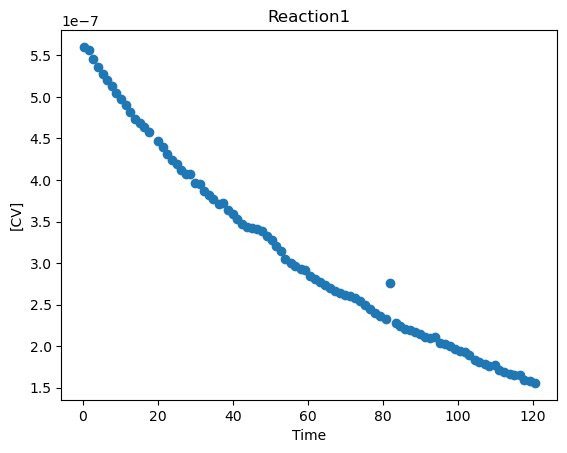

In [38]:
plt.scatter(xdata1, ydata1, label='reaction1')
plt.xlabel('Time')
plt.ylabel('[CV]')
plt.title('Reaction1')

The above block of code is the simplest version of a graph for the data using the x and y data collected for reaction 1. plt.scatter denotes the graph as a scatter plot, and plt.xlabel, plt,ylabel, and plt.title describe what should be displayed as the x-axis label, the y-axis label, and the title of the graph respectively. 

Reaction 2

Text(0.5, 1.0, 'Reaction2')

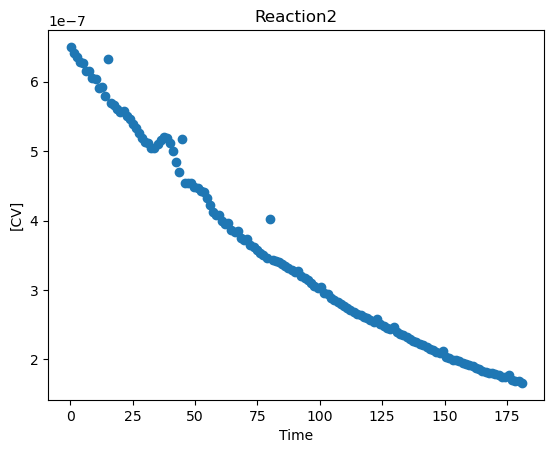

In [39]:
plt.scatter(xdata2, ydata2, label='reaction2')
plt.xlabel('Time')
plt.ylabel('[CV]')
plt.title('Reaction2')

Reaction 3

Text(0.5, 1.0, 'Reaction3')

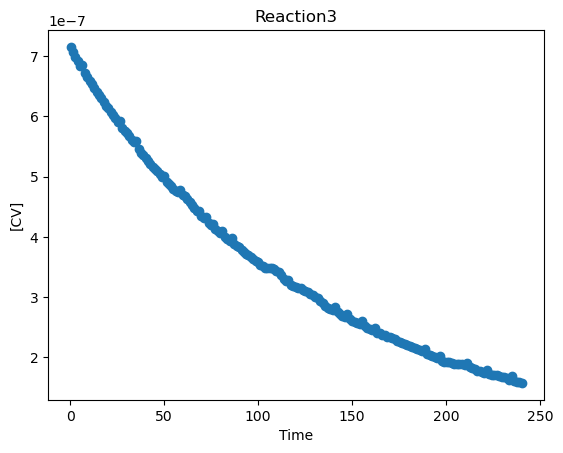

In [40]:
plt.scatter(xdata3, ydata3, label='reaction3')
plt.xlabel('Time')
plt.ylabel('[CV]')
plt.title('Reaction3')

Reaction 4

Text(0.5, 1.0, 'Reaction4')

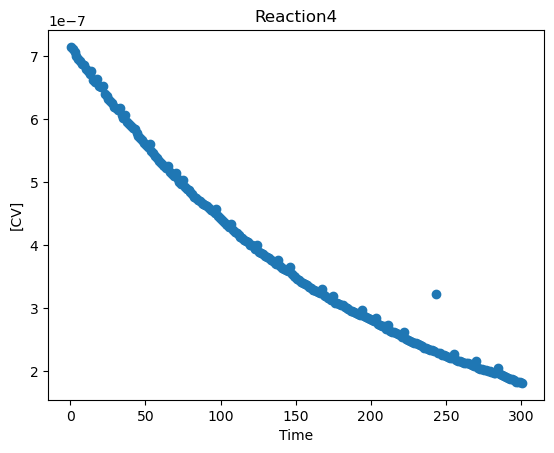

In [41]:
plt.scatter(xdata4, ydata4, label='reaction4')
plt.xlabel('Time')
plt.ylabel('[CV]')
plt.title('Reaction4')

Reaction 5

Text(0.5, 1.0, 'Reaction5')

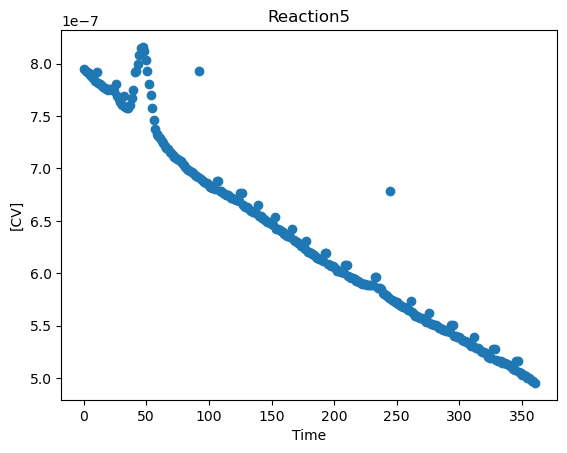

In [42]:
plt.scatter(xdata5, ydata5, label='reaction5')
plt.xlabel('Time')
plt.ylabel('[CV]')
plt.title('Reaction5')

Graphing the Curves

In [43]:
x_opt, y_opt = popt11

x_opt and y_opt were calculated in the fitting the curve section of the code, the above code is simply naming those numbers.  

In [45]:
x_model= numpy.linspace(min(xdata1), max(xdata1), 1000) 
y_model= first(x_model, x_opt, y_opt)

The x_model described above is based off of the maximum and minimum x values of reaction one with many points within the range seen in the x values. The y_model is based on the first order function, the x_model and the optimal values for x and y as previously defined by popt11. 

Text(0.5, 1.0, 'Reaction1 Curve')

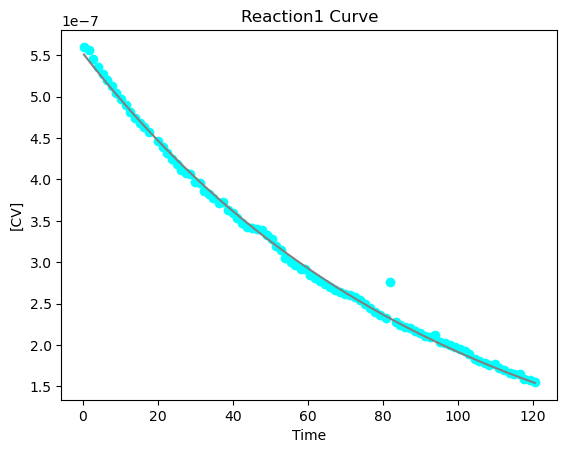

In [56]:
plt.scatter(xdata1, ydata1, label='reaction1', color='cyan')
plt.plot(x_model, y_model, color='gray') 
plt.xlabel('Time')
plt.ylabel('[CV]')
plt.title('Reaction1 Curve')

Much like the more simple graph, the data from the reaction itself is represented in a scatter plot. In addition to the scatter plot, the curve calculated by popt11 is also graphed as a line using x_model and y_model as refrences. 

Reaction 2

Text(0.5, 1.0, 'Reaction2 Curve')

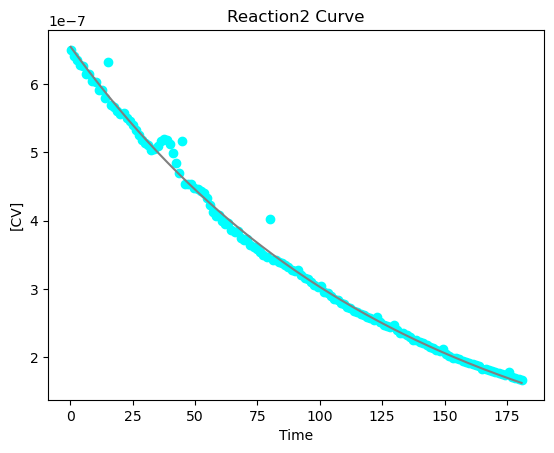

In [57]:
x_opt2, y_opt2 = popt2
x_model2= numpy.linspace(min(xdata2), max(xdata2), 1000) 
y_model2= first(x_model2, x_opt2, y_opt2)
plt.scatter(xdata2, ydata2, label='reaction2', color='cyan')
plt.plot(x_model2, y_model2, color='gray') 
plt.xlabel('Time')
plt.ylabel('[CV]')
plt.title('Reaction2 Curve')

Reaction 3

Text(0.5, 1.0, 'Reaction3 Curve')

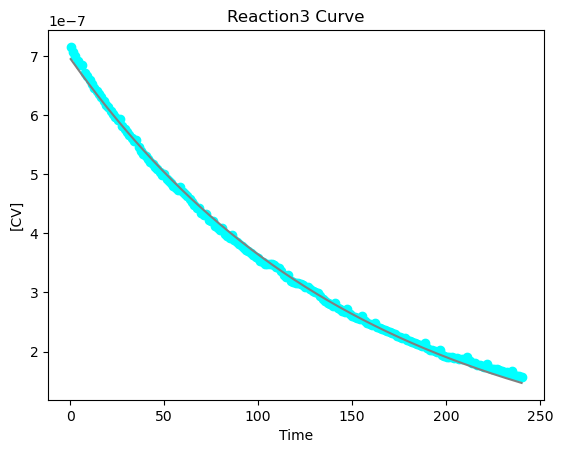

In [58]:
x_opt3, y_opt3 = popt3
x_model3= numpy.linspace(min(xdata3), max(xdata3), 1000) 
y_model3= first(x_model3, x_opt3, y_opt3)
plt.scatter(xdata3, ydata3, label='reaction3', color='cyan')
plt.plot(x_model3, y_model3, color='gray') 
plt.xlabel('Time')
plt.ylabel('[CV]')
plt.title('Reaction3 Curve')

Reaction 4

Text(0.5, 1.0, 'Reaction4 Curve')

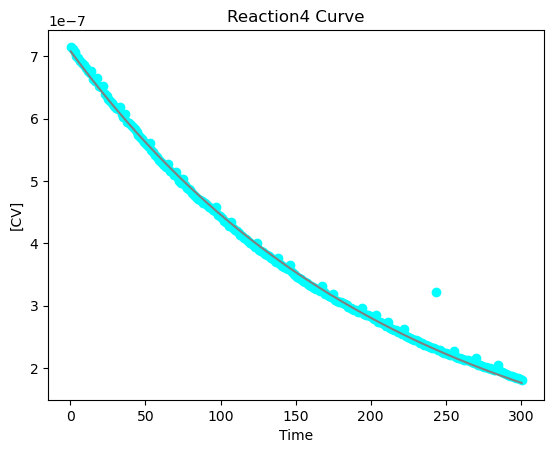

In [59]:
x_opt4, y_opt4 = popt4
x_model4= numpy.linspace(min(xdata4), max(xdata4), 1000) 
y_model4= first(x_model4, x_opt4, y_opt4)
plt.scatter(xdata4, ydata4, label='reaction4', color='cyan')
plt.plot(x_model4, y_model4, color='gray') 
plt.xlabel('Time')
plt.ylabel('[CV]')
plt.title('Reaction4 Curve')

Reaction 5

Text(0.5, 1.0, 'Reaction5 Curve')

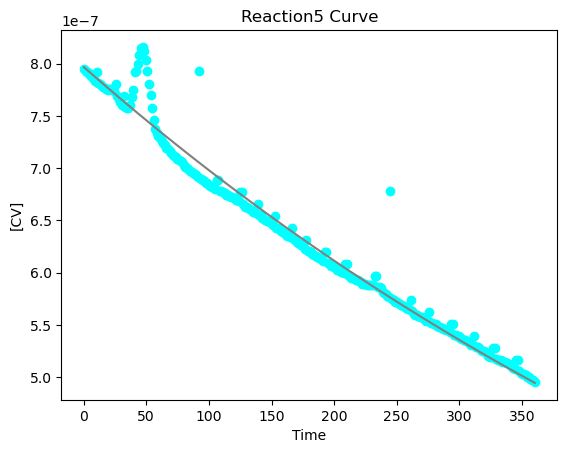

In [60]:
x_opt5, y_opt5 = popt5
x_model5= numpy.linspace(min(xdata5), max(xdata5), 1000) 
y_model5= first(x_model5, x_opt5, y_opt5)
plt.scatter(xdata5, ydata5, label='reaction5', color='cyan')
plt.plot(x_model5, y_model5, color='gray') 
plt.xlabel('Time')
plt.ylabel('[CV]')
plt.title('Reaction5 Curve')

Conclusion??